# Visualizing Text Data

What makes text data so difficult to visualize?


The unstructured nature of text data makes it much more difficult to analyze.  Because it often takes a lot of preprocessing to visualize text data, we'll focus on talking through these examples rather than writing code.

In this lecture, we're going to focus on analyzing reviews of a few fancy European restaurants.  What do people like?  What are they complaing about?  How can we figure that out?

In [2]:
import pandas as pd

df = pd.read_csv('assets/European Restaurant Reviews.csv')

df.head()

,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


## What are some relationships we might try to visualize using this data?

### We can use a word clouds:

Positive Review Titles


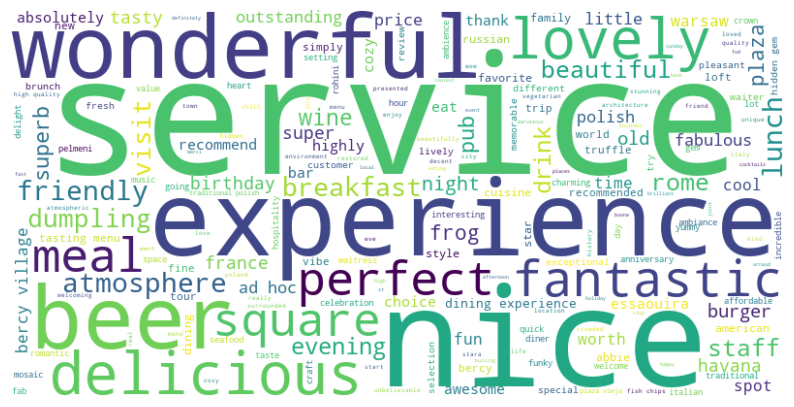

Negative Review Titles


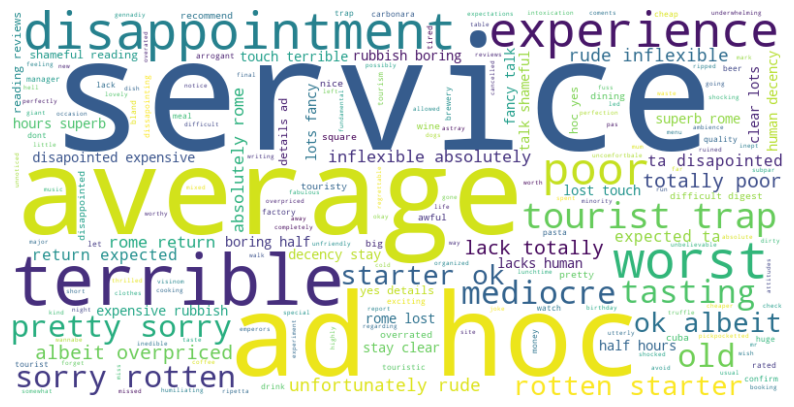

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sklearn_stop_words

# Define additional stopwords to remove
additional_stopwords = {'food', 'restaurant', 'good', 'best', 'great', 'bad', 'disappointing', 'dinner', 'place', 'excellent', 'amazing'}

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Review Title'].astype(str))
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Review Title'].astype(str))

# Tokenize the words
postive_words = positive_reviews.lower().split()
    
# Remove punctuation and stopwords (including additional stopwords)
postive_words = [word.strip(string.punctuation) for word in postive_words if word.isalnum() and word not in sklearn_stop_words and word not in additional_stopwords]
    
# Generate the word cloud
print('Positive Review Titles')
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(postive_words))
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Negative reviews
negative_words = negative_reviews.lower().split()
    
# Remove punctuation and stopwords (including additional stopwords)
negative_words = [word.strip(string.punctuation) for word in negative_words if word.isalnum() and word not in sklearn_stop_words and word not in additional_stopwords]
    
# Generate the word cloud
print('Negative Review Titles')
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(negative_words))
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


What are some positive aspects of word clouds?  What are some negatives?

### We can look at word frequencies:

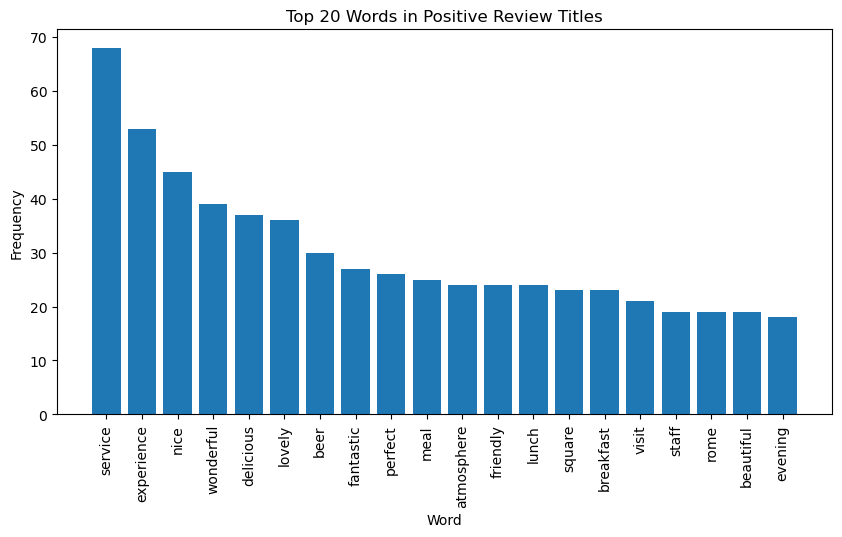

In [7]:
positive_word_freq = Counter(postive_words)
positive_common_words = positive_word_freq.most_common(20)
    
# Convert to DataFrame for plotting
positive_freq_df = pd.DataFrame(positive_common_words, columns=['Word', 'Frequency'])
    
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(positive_freq_df['Word'], positive_freq_df['Frequency'])
ax.set_title(f'Top 20 Words in Positive Review Titles')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

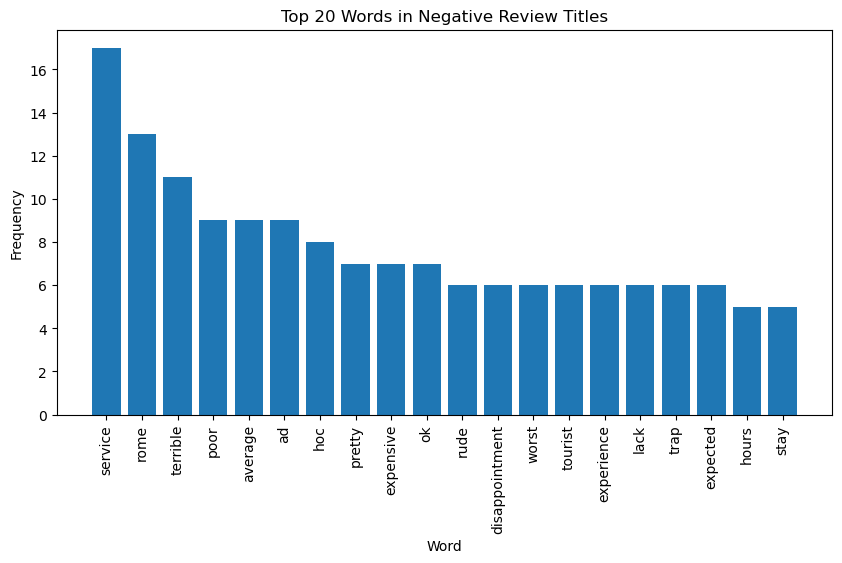

In [8]:
negative_word_freq = Counter(negative_words)
negative_common_words = negative_word_freq.most_common(20)
    
# Convert to DataFrame for plotting
negative_freq_df = pd.DataFrame(negative_common_words, columns=['Word', 'Frequency'])
    
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(negative_freq_df['Word'], negative_freq_df['Frequency'])
ax.set_title(f'Top 20 Words in Negative Review Titles')
ax.set_xlabel('Word')
ax.set_ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

## Sentiment

Another way to look at the data is to see how different words factor into the overall sentiment of a review.  There are different ways to do this, but one way is by using the textblob library (Python has tons of NLP libraries) to compute the sentiment of each review.  Sentiment can be positive (a positive value), negative (a negative value) or neutral (a value at or near 0).  

Interestingly, the sentiment calculated by textblob doesn't align perfectly (though it does generally match up) with the positive/negative label given in the data.  

Let's look at the sentiment vs subjectivity color coded by the sentiment label in the dataset.


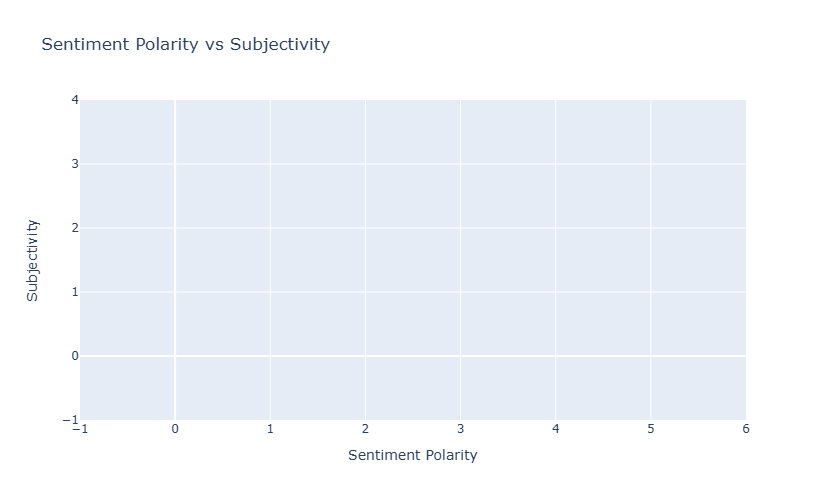

In [10]:
#%pip install textblob
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from textblob import TextBlob
import plotly.express as px

# Sentiment calculations
df['calc_sentiment'] = df['Review Title'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['subjectivity'] = df['Review Title'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df['abs_sentiment'] = df['calc_sentiment'].abs()

# Optional: Make sentiment a category to suppress warning
df['Sentiment'] = df['Sentiment'].astype(str)



# scatter plot of sentiment polarity vs subjectivity
fig = px.scatter(
    df,
    x='calc_sentiment',
    y='subjectivity',
    color='Sentiment',
    size='abs_sentiment',
    size_max=15,
    hover_name='Restaurant Name',
    hover_data={'Review Title': True},
    labels={
        'calc_sentiment': 'Sentiment Polarity',
        'subjectivity': 'Subjectivity'
    },
    title='Sentiment Polarity vs Subjectivity'
)

# adjust axis titles and overall height
fig.update_layout(
    xaxis_title='Sentiment Polarity',
    yaxis_title='Subjectivity',
    height=500
)

fig.show()




Now lets color code by restaruant.


In [ ]:
fig = px.scatter(df, x='calc_sentiment', y='subjectivity', 
                 hover_data=['Review Title'],
                 color='Restaurant Name',
                 size='abs_sentiment',
                 size_max = 15,
                 title='Sentiment Polarity vs Subjectivity',
                 hover_name = 'Restaurant Name',
                 labels={'sentiment': 'Sentiment Polarity', 'subjectivity': 'Subjectivity'})

fig.update_layout(xaxis_title = 'Sentiment', height=500)
fig.show()

Let's look at the range of sentiment associated with each word.

In [ ]:
import seaborn as sns

keywords = ['lunch']#["wait", "service", "expensive"] #["disgusting", "delicious", "overpriced"]#, ]

# Filter reviews based on the presence of keywords and compute sentiment for each keyword
sentiments = {}
for keyword in keywords:
    sentiments[keyword] = df[df['Review'].str.contains(keyword, case=False, na=False)]['calc_sentiment']

# Plot
plt.figure(figsize=(12, 8))
for keyword, sentiment in sentiments.items():
    sns.histplot(sentiment, label=keyword)
    
plt.title('Sentiment Distribution by Keyword')
plt.xlabel('Sentiment')
plt.legend()

### Review Metadata

In [ ]:
df['review_length'] = df['Review'].str.len()


# Create the box plot
fig = px.box(df, x='Sentiment', y='review_length', title='Review Length by Sentiment Category',
             labels={'review_length': 'Review Length'})

# Show the plot
fig.show()


In [28]:
#Cosine similarity

from textblob import TextBlob
import numpy as np

#This is the disputed one

f49 = """

THE author of the "Notes on the State of Virginia,'' quoted in the last paper, has subjoined to that valuable work the draught of a constitution, which had been prepared in order to be laid before a convention, expected to be called in 1783, by the legislature, for the establishment of a constitution for that commonwealth. The plan, like every thing from the same pen, marks a turn of thinking, original, comprehensive, and accurate; and is the more worthy of attention as it equally displays a fervent attachment to republican government and an enlightened view of the dangerous propensities against which it ought to be guarded. One of the precautions which he proposes, and on which he appears ultimately to rely as a palladium to the weaker departments of power against the invasions of the stronger, is perhaps altogether his own, and as it immediately relates to the subject of our present inquiry, ought not to be overlooked. His proposition is, that whenever any two of the three branches of government shall concur in opinion, each by the voices of two thirds of their whole number, that a convention is necessary for altering the constitution, or CORRECTING BREACHES OF IT, a convention shall be called for the purpose. ''As the people are the only legitimate fountain of power, and it is from them that the constitutional charter, under which the several branches of government hold their power, is derived, it seems strictly consonant to the republican theory, to recur to the same original authority, not only whenever it may be necessary to enlarge, diminish, or new-model the powers of the government, but also whenever any one of the departments may commit encroachments on the chartered authorities of the others.

The several departments being perfectly co-ordinate by the terms of their common commission, none of them, it is evident, can pretend to an exclusive or superior right of settling the boundaries between their respective powers; and how are the encroachments of the stronger to be prevented, or the wrongs of the weaker to be redressed, without an appeal to the people themselves, who, as the grantors of the commissions, can alone declare its true meaning, and enforce its observance? There is certainly great force in this reasoning, and it must be allowed to prove that a constitutional road to the decision of the people ought to be marked out and kept open, for certain great and extraordinary occasions. But there appear to be insuperable objections against the proposed recurrence to the people, as a provision in all cases for keeping the several departments of power within their constitutional limits. In the first place, the provision does not reach the case of a combination of two of the departments against the third. If the legislative authority, which possesses so many means of operating on the motives of the other departments, should be able to gain to its interest either of the others, or even one third of its members, the remaining department could derive no advantage from its remedial provision. I do not dwell, however, on this objection, because it may be thought to be rather against the modification of the principle, than against the principle itself. In the next place, it may be considered as an objection inherent in the principle, that as every appeal to the people would carry an implication of some defect in the government, frequent appeals would, in a great measure, deprive the government of that veneration which time bestows on every thing, and without which perhaps the wisest and freest governments would not possess the requisite stability.

If it be true that all governments rest on opinion, it is no less true that the strength of opinion in each individual, and its practical influence on his conduct, depend much on the number which he supposes to have entertained the same opinion. The reason of man, like man himself, is timid and cautious when left alone, and acquires firmness and confidence in proportion to the number with which it is associated. When the examples which fortify opinion are ANCIENT as well as NUMEROUS, they are known to have a double effect. In a nation of philosophers, this consideration ought to be disregarded. A reverence for the laws would be sufficiently inculcated by the voice of an enlightened reason. But a nation of philosophers is as little to be expected as the philosophical race of kings wished for by Plato. And in every other nation, the most rational government will not find it a superfluous advantage to have the prejudices of the community on its side. The danger of disturbing the public tranquillity by interesting too strongly the public passions, is a still more serious objection against a frequent reference of constitutional questions to the decision of the whole society. Notwithstanding the success which has attended the revisions of our established forms of government, and which does so much honor to the virtue and intelligence of the people of America, it must be confessed that the experiments are of too ticklish a nature to be unnecessarily multiplied.

We are to recollect that all the existing constitutions were formed in the midst of a danger which repressed the passions most unfriendly to order and concord; of an enthusiastic confidence of the people in their patriotic leaders, which stifled the ordinary diversity of opinions on great national questions; of a universal ardor for new and opposite forms, produced by a universal resentment and indignation against the ancient government; and whilst no spirit of party connected with the changes to be made, or the abuses to be reformed, could mingle its leaven in the operation. The future situations in which we must expect to be usually placed, do not present any equivalent security against the danger which is apprehended. But the greatest objection of all is, that the decisions which would probably result from such appeals would not answer the purpose of maintaining the constitutional equilibrium of the government.

We have seen that the tendency of republican governments is to an aggrandizement of the legislative at the expense of the other departments. The appeals to the people, therefore, would usually be made by the executive and judiciary departments. But whether made by one side or the other, would each side enjoy equal advantages on the trial? Let us view their different situations. The members of the executive and judiciary departments are few in number, and can be personally known to a small part only of the people. The latter, by the mode of their appointment, as well as by the nature and permanency of it, are too far removed from the people to share much in their prepossessions. The former are generally the objects of jealousy, and their administration is always liable to be discolored and rendered unpopular. The members of the legislative department, on the other hand, are numberous. They are distributed and dwell among the people at large. Their connections of blood, of friendship, and of acquaintance embrace a great proportion of the most influential part of the society. The nature of their public trust implies a personal influence among the people, and that they are more immediately the confidential guardians of the rights and liberties of the people.

With these advantages, it can hardly be supposed that the adverse party would have an equal chance for a favorable issue. But the legislative party would not only be able to plead their cause most successfully with the people. They would probably be constituted themselves the judges. The same influence which had gained them an election into the legislature, would gain them a seat in the convention. If this should not be the case with all, it would probably be the case with many, and pretty certainly with those leading characters, on whom every thing depends in such bodies. The convention, in short, would be composed chiefly of men who had been, who actually were, or who expected to be, members of the department whose conduct was arraigned. They would consequently be parties to the very question to be decided by them. It might, however, sometimes happen, that appeals would be made under circumstances less adverse to the executive and judiciary departments. The usurpations of the legislature might be so flagrant and so sudden, as to admit of no specious coloring. A strong party among themselves might take side with the other branches. The executive power might be in the hands of a peculiar favorite of the people.

In such a posture of things, the public decision might be less swayed by prepossessions in favor of the legislative party. But still it could never be expected to turn on the true merits of the question. It would inevitably be connected with the spirit of pre-existing parties, or of parties springing out of the question itself. It would be connected with persons of distinguished character and extensive influence in the community. It would be pronounced by the very men who had been agents in, or opponents of, the measures to which the decision would relate. The PASSIONS, therefore, not the REASON, of the public would sit in judgment. But it is the reason, alone, of the public, that ought to control and regulate the government. The passions ought to be controlled and regulated by the government. We found in the last paper, that mere declarations in the written constitution are not sufficient to restrain the several departments within their legal rights. It appears in this, that occasional appeals to the people would be neither a proper nor an effectual provision for that purpose. How far the provisions of a different nature contained in the plan above quoted might be adequate, I do not examine. Some of them are unquestionably founded on sound political principles, and all of them are framed with singular ingenuity and precision.

"""

#This is by James Madison

f10 = """
AMONG the numerous advantages promised by a wellconstructed Union, none deserves to be more accurately developed than its tendency to break and control the violence of faction. The friend of popular governments never finds himself so much alarmed for their character and fate, as when he contemplates their propensity to this dangerous vice. He will not fail, therefore, to set a due value on any plan which, without violating the principles to which he is attached, provides a proper cure for it. The instability, injustice, and confusion introduced into the public councils, have, in truth, been the mortal diseases under which popular governments have everywhere perished; as they continue to be the favorite and fruitful topics from which the adversaries to liberty derive their most specious declamations. The valuable improvements made by the American constitutions on the popular models, both ancient and modern, cannot certainly be too much admired; but it would be an unwarrantable partiality, to contend that they have as effectually obviated the danger on this side, as was wished and expected. Complaints are everywhere heard from our most considerate and virtuous citizens, equally the friends of public and private faith, and of public and personal liberty, that our governments are too unstable, that the public good is disregarded in the conflicts of rival parties, and that measures are too often decided, not according to the rules of justice and the rights of the minor party, but by the superior force of an interested and overbearing majority. However anxiously we may wish that these complaints had no foundation, the evidence, of known facts will not permit us to deny that they are in some degree true. It will be found, indeed, on a candid review of our situation, that some of the distresses under which we labor have been erroneously charged on the operation of our governments; but it will be found, at the same time, that other causes will not alone account for many of our heaviest misfortunes; and, particularly, for that prevailing and increasing distrust of public engagements, and alarm for private rights, which are echoed from one end of the continent to the other. These must be chiefly, if not wholly, effects of the unsteadiness and injustice with which a factious spirit has tainted our public administrations.

By a faction, I understand a number of citizens, whether amounting to a majority or a minority of the whole, who are united and actuated by some common impulse of passion, or of interest, adversed to the rights of other citizens, or to the permanent and aggregate interests of the community.

There are two methods of curing the mischiefs of faction: the one, by removing its causes; the other, by controlling its effects.

There are again two methods of removing the causes of faction: the one, by destroying the liberty which is essential to its existence; the other, by giving to every citizen the same opinions, the same passions, and the same interests.

It could never be more truly said than of the first remedy, that it was worse than the disease. Liberty is to faction what air is to fire, an aliment without which it instantly expires. But it could not be less folly to abolish liberty, which is essential to political life, because it nourishes faction, than it would be to wish the annihilation of air, which is essential to animal life, because it imparts to fire its destructive agency.

The second expedient is as impracticable as the first would be unwise. As long as the reason of man continues fallible, and he is at liberty to exercise it, different opinions will be formed. As long as the connection subsists between his reason and his self-love, his opinions and his passions will have a reciprocal influence on each other; and the former will be objects to which the latter will attach themselves. The diversity in the faculties of men, from which the rights of property originate, is not less an insuperable obstacle to a uniformity of interests. The protection of these faculties is the first object of government. From the protection of different and unequal faculties of acquiring property, the possession of different degrees and kinds of property immediately results; and from the influence of these on the sentiments and views of the respective proprietors, ensues a division of the society into different interests and parties.

The latent causes of faction are thus sown in the nature of man; and we see them everywhere brought into different degrees of activity, according to the different circumstances of civil society. A zeal for different opinions concerning religion, concerning government, and many other points, as well of speculation as of practice; an attachment to different leaders ambitiously contending for pre-eminence and power; or to persons of other descriptions whose fortunes have been interesting to the human passions, have, in turn, divided mankind into parties, inflamed them with mutual animosity, and rendered them much more disposed to vex and oppress each other than to co-operate for their common good. So strong is this propensity of mankind to fall into mutual animosities, that where no substantial occasion presents itself, the most frivolous and fanciful distinctions have been sufficient to kindle their unfriendly passions and excite their most violent conflicts. But the most common and durable source of factions has been the various and unequal distribution of property. Those who hold and those who are without property have ever formed distinct interests in society. Those who are creditors, and those who are debtors, fall under a like discrimination. A landed interest, a manufacturing interest, a mercantile interest, a moneyed interest, with many lesser interests, grow up of necessity in civilized nations, and divide them into different classes, actuated by different sentiments and views. The regulation of these various and interfering interests forms the principal task of modern legislation, and involves the spirit of party and faction in the necessary and ordinary operations of the government.

No man is allowed to be a judge in his own cause, because his interest would certainly bias his judgment, and, not improbably, corrupt his integrity. With equal, nay with greater reason, a body of men are unfit to be both judges and parties at the same time; yet what are many of the most important acts of legislation, but so many judicial determinations, not indeed concerning the rights of single persons, but concerning the rights of large bodies of citizens? And what are the different classes of legislators but advocates and parties to the causes which they determine? Is a law proposed concerning private debts? It is a question to which the creditors are parties on one side and the debtors on the other. Justice ought to hold the balance between them. Yet the parties are, and must be, themselves the judges; and the most numerous party, or, in other words, the most powerful faction must be expected to prevail. Shall domestic manufactures be encouraged, and in what degree, by restrictions on foreign manufactures? are questions which would be differently decided by the landed and the manufacturing classes, and probably by neither with a sole regard to justice and the public good. The apportionment of taxes on the various descriptions of property is an act which seems to require the most exact impartiality; yet there is, perhaps, no legislative act in which greater opportunity and temptation are given to a predominant party to trample on the rules of justice. Every shilling with which they overburden the inferior number, is a shilling saved to their own pockets.

It is in vain to say that enlightened statesmen will be able to adjust these clashing interests, and render them all subservient to the public good. Enlightened statesmen will not always be at the helm. Nor, in many cases, can such an adjustment be made at all without taking into view indirect and remote considerations, which will rarely prevail over the immediate interest which one party may find in disregarding the rights of another or the good of the whole.

The inference to which we are brought is, that the CAUSES of faction cannot be removed, and that relief is only to be sought in the means of controlling its EFFECTS.

If a faction consists of less than a majority, relief is supplied by the republican principle, which enables the majority to defeat its sinister views by regular vote. It may clog the administration, it may convulse the society; but it will be unable to execute and mask its violence under the forms of the Constitution. When a majority is included in a faction, the form of popular government, on the other hand, enables it to sacrifice to its ruling passion or interest both the public good and the rights of other citizens. To secure the public good and private rights against the danger of such a faction, and at the same time to preserve the spirit and the form of popular government, is then the great object to which our inquiries are directed. Let me add that it is the great desideratum by which this form of government can be rescued from the opprobrium under which it has so long labored, and be recommended to the esteem and adoption of mankind.

By what means is this object attainable? Evidently by one of two only. Either the existence of the same passion or interest in a majority at the same time must be prevented, or the majority, having such coexistent passion or interest, must be rendered, by their number and local situation, unable to concert and carry into effect schemes of oppression. If the impulse and the opportunity be suffered to coincide, we well know that neither moral nor religious motives can be relied on as an adequate control. They are not found to be such on the injustice and violence of individuals, and lose their efficacy in proportion to the number combined together, that is, in proportion as their efficacy becomes needful.

From this view of the subject it may be concluded that a pure democracy, by which I mean a society consisting of a small number of citizens, who assemble and administer the government in person, can admit of no cure for the mischiefs of faction. A common passion or interest will, in almost every case, be felt by a majority of the whole; a communication and concert result from the form of government itself; and there is nothing to check the inducements to sacrifice the weaker party or an obnoxious individual. Hence it is that such democracies have ever been spectacles of turbulence and contention; have ever been found incompatible with personal security or the rights of property; and have in general been as short in their lives as they have been violent in their deaths. Theoretic politicians, who have patronized this species of government, have erroneously supposed that by reducing mankind to a perfect equality in their political rights, they would, at the same time, be perfectly equalized and assimilated in their possessions, their opinions, and their passions.

A republic, by which I mean a government in which the scheme of representation takes place, opens a different prospect, and promises the cure for which we are seeking. Let us examine the points in which it varies from pure democracy, and we shall comprehend both the nature of the cure and the efficacy which it must derive from the Union.

The two great points of difference between a democracy and a republic are: first, the delegation of the government, in the latter, to a small number of citizens elected by the rest; secondly, the greater number of citizens, and greater sphere of country, over which the latter may be extended.

The effect of the first difference is, on the one hand, to refine and enlarge the public views, by passing them through the medium of a chosen body of citizens, whose wisdom may best discern the true interest of their country, and whose patriotism and love of justice will be least likely to sacrifice it to temporary or partial considerations. Under such a regulation, it may well happen that the public voice, pronounced by the representatives of the people, will be more consonant to the public good than if pronounced by the people themselves, convened for the purpose. On the other hand, the effect may be inverted. Men of factious tempers, of local prejudices, or of sinister designs, may, by intrigue, by corruption, or by other means, first obtain the suffrages, and then betray the interests, of the people. The question resulting is, whether small or extensive republics are more favorable to the election of proper guardians of the public weal; and it is clearly decided in favor of the latter by two obvious considerations:

In the first place, it is to be remarked that, however small the republic may be, the representatives must be raised to a certain number, in order to guard against the cabals of a few; and that, however large it may be, they must be limited to a certain number, in order to guard against the confusion of a multitude. Hence, the number of representatives in the two cases not being in proportion to that of the two constituents, and being proportionally greater in the small republic, it follows that, if the proportion of fit characters be not less in the large than in the small republic, the former will present a greater option, and consequently a greater probability of a fit choice.

In the next place, as each representative will be chosen by a greater number of citizens in the large than in the small republic, it will be more difficult for unworthy candidates to practice with success the vicious arts by which elections are too often carried; and the suffrages of the people being more free, will be more likely to centre in men who possess the most attractive merit and the most diffusive and established characters.

It must be confessed that in this, as in most other cases, there is a mean, on both sides of which inconveniences will be found to lie. By enlarging too much the number of electors, you render the representatives too little acquainted with all their local circumstances and lesser interests; as by reducing it too much, you render him unduly attached to these, and too little fit to comprehend and pursue great and national objects. The federal Constitution forms a happy combination in this respect; the great and aggregate interests being referred to the national, the local and particular to the State legislatures.

The other point of difference is, the greater number of citizens and extent of territory which may be brought within the compass of republican than of democratic government; and it is this circumstance principally which renders factious combinations less to be dreaded in the former than in the latter. The smaller the society, the fewer probably will be the distinct parties and interests composing it; the fewer the distinct parties and interests, the more frequently will a majority be found of the same party; and the smaller the number of individuals composing a majority, and the smaller the compass within which they are placed, the more easily will they concert and execute their plans of oppression. Extend the sphere, and you take in a greater variety of parties and interests; you make it less probable that a majority of the whole will have a common motive to invade the rights of other citizens; or if such a common motive exists, it will be more difficult for all who feel it to discover their own strength, and to act in unison with each other. Besides other impediments, it may be remarked that, where there is a consciousness of unjust or dishonorable purposes, communication is always checked by distrust in proportion to the number whose concurrence is necessary.

Hence, it clearly appears, that the same advantage which a republic has over a democracy, in controlling the effects of faction, is enjoyed by a large over a small republic,--is enjoyed by the Union over the States composing it. Does the advantage consist in the substitution of representatives whose enlightened views and virtuous sentiments render them superior to local prejudices and schemes of injustice? It will not be denied that the representation of the Union will be most likely to possess these requisite endowments. Does it consist in the greater security afforded by a greater variety of parties, against the event of any one party being able to outnumber and oppress the rest? In an equal degree does the increased variety of parties comprised within the Union, increase this security. Does it, in fine, consist in the greater obstacles opposed to the concert and accomplishment of the secret wishes of an unjust and interested majority? Here, again, the extent of the Union gives it the most palpable advantage.

The influence of factious leaders may kindle a flame within their particular States, but will be unable to spread a general conflagration through the other States. A religious sect may degenerate into a political faction in a part of the Confederacy; but the variety of sects dispersed over the entire face of it must secure the national councils against any danger from that source. A rage for paper money, for an abolition of debts, for an equal division of property, or for any other improper or wicked project, will be less apt to pervade the whole body of the Union than a particular member of it; in the same proportion as such a malady is more likely to taint a particular county or district, than an entire State.

In the extent and proper structure of the Union, therefore, we behold a republican remedy for the diseases most incident to republican government. And according to the degree of pleasure and pride we feel in being republicans, ought to be our zeal in cherishing the spirit and supporting the character of Federalists.

"""

#This is by Alexander Hamilton

f78 = """
WE PROCEED now to an examination of the judiciary department of the proposed government.

In unfolding the defects of the existing Confederation, the utility and necessity of a federal judicature have been clearly pointed out. It is the less necessary to recapitulate the considerations there urged, as the propriety of the institution in the abstract is not disputed; the only questions which have been raised being relative to the manner of constituting it, and to its extent. To these points, therefore, our observations shall be confined.

The manner of constituting it seems to embrace these several objects: 1st. The mode of appointing the judges. 2d. The tenure by which they are to hold their places. 3d. The partition of the judiciary authority between different courts, and their relations to each other.

First. As to the mode of appointing the judges; this is the same with that of appointing the officers of the Union in general, and has been so fully discussed in the two last numbers, that nothing can be said here which would not be useless repetition.

Second. As to the tenure by which the judges are to hold their places; this chiefly concerns their duration in office; the provisions for their support; the precautions for their responsibility.

According to the plan of the convention, all judges who may be appointed by the United States are to hold their offices DURING GOOD BEHAVIOR; which is conformable to the most approved of the State constitutions and among the rest, to that of this State. Its propriety having been drawn into question by the adversaries of that plan, is no light symptom of the rage for objection, which disorders their imaginations and judgments. The standard of good behavior for the continuance in office of the judicial magistracy, is certainly one of the most valuable of the modern improvements in the practice of government. In a monarchy it is an excellent barrier to the despotism of the prince; in a republic it is a no less excellent barrier to the encroachments and oppressions of the representative body. And it is the best expedient which can be devised in any government, to secure a steady, upright, and impartial administration of the laws.

Whoever attentively considers the different departments of power must perceive, that, in a government in which they are separated from each other, the judiciary, from the nature of its functions, will always be the least dangerous to the political rights of the Constitution; because it will be least in a capacity to annoy or injure them. The Executive not only dispenses the honors, but holds the sword of the community. The legislature not only commands the purse, but prescribes the rules by which the duties and rights of every citizen are to be regulated. The judiciary, on the contrary, has no influence over either the sword or the purse; no direction either of the strength or of the wealth of the society; and can take no active resolution whatever. It may truly be said to have neither FORCE nor WILL, but merely judgment; and must ultimately depend upon the aid of the executive arm even for the efficacy of its judgments.

This simple view of the matter suggests several important consequences. It proves incontestably, that the judiciary is beyond comparison the weakest of the three departments of power1; that it can never attack with success either of the other two; and that all possible care is requisite to enable it to defend itself against their attacks. It equally proves, that though individual oppression may now and then proceed from the courts of justice, the general liberty of the people can never be endangered from that quarter; I mean so long as the judiciary remains truly distinct from both the legislature and the Executive. For I agree, that "there is no liberty, if the power of judging be not separated from the legislative and executive powers.''2 And it proves, in the last place, that as liberty can have nothing to fear from the judiciary alone, but would have every thing to fear from its union with either of the other departments; that as all the effects of such a union must ensue from a dependence of the former on the latter, notwithstanding a nominal and apparent separation; that as, from the natural feebleness of the judiciary, it is in continual jeopardy of being overpowered, awed, or influenced by its co-ordinate branches; and that as nothing can contribute so much to its firmness and independence as permanency in office, this quality may therefore be justly regarded as an indispensable ingredient in its constitution, and, in a great measure, as the citadel of the public justice and the public security.

The complete independence of the courts of justice is peculiarly essential in a limited Constitution. By a limited Constitution, I understand one which contains certain specified exceptions to the legislative authority; such, for instance, as that it shall pass no bills of attainder, no ex-post-facto laws, and the like. Limitations of this kind can be preserved in practice no other way than through the medium of courts of justice, whose duty it must be to declare all acts contrary to the manifest tenor of the Constitution void. Without this, all the reservations of particular rights or privileges would amount to nothing.

Some perplexity respecting the rights of the courts to pronounce legislative acts void, because contrary to the Constitution, has arisen from an imagination that the doctrine would imply a superiority of the judiciary to the legislative power. It is urged that the authority which can declare the acts of another void, must necessarily be superior to the one whose acts may be declared void. As this doctrine is of great importance in all the American constitutions, a brief discussion of the ground on which it rests cannot be unacceptable.

There is no position which depends on clearer principles, than that every act of a delegated authority, contrary to the tenor of the commission under which it is exercised, is void. No legislative act, therefore, contrary to the Constitution, can be valid. To deny this, would be to affirm, that the deputy is greater than his principal; that the servant is above his master; that the representatives of the people are superior to the people themselves; that men acting by virtue of powers, may do not only what their powers do not authorize, but what they forbid.

If it be said that the legislative body are themselves the constitutional judges of their own powers, and that the construction they put upon them is conclusive upon the other departments, it may be answered, that this cannot be the natural presumption, where it is not to be collected from any particular provisions in the Constitution. It is not otherwise to be supposed, that the Constitution could intend to enable the representatives of the people to substitute their WILL to that of their constituents. It is far more rational to suppose, that the courts were designed to be an intermediate body between the people and the legislature, in order, among other things, to keep the latter within the limits assigned to their authority. The interpretation of the laws is the proper and peculiar province of the courts. A constitution is, in fact, and must be regarded by the judges, as a fundamental law. It therefore belongs to them to ascertain its meaning, as well as the meaning of any particular act proceeding from the legislative body. If there should happen to be an irreconcilable variance between the two, that which has the superior obligation and validity ought, of course, to be preferred; or, in other words, the Constitution ought to be preferred to the statute, the intention of the people to the intention of their agents.

Nor does this conclusion by any means suppose a superiority of the judicial to the legislative power. It only supposes that the power of the people is superior to both; and that where the will of the legislature, declared in its statutes, stands in opposition to that of the people, declared in the Constitution, the judges ought to be governed by the latter rather than the former. They ought to regulate their decisions by the fundamental laws, rather than by those which are not fundamental.

This exercise of judicial discretion, in determining between two contradictory laws, is exemplified in a familiar instance. It not uncommonly happens, that there are two statutes existing at one time, clashing in whole or in part with each other, and neither of them containing any repealing clause or expression. In such a case, it is the province of the courts to liquidate and fix their meaning and operation. So far as they can, by any fair construction, be reconciled to each other, reason and law conspire to dictate that this should be done; where this is impracticable, it becomes a matter of necessity to give effect to one, in exclusion of the other. The rule which has obtained in the courts for determining their relative validity is, that the last in order of time shall be preferred to the first. But this is a mere rule of construction, not derived from any positive law, but from the nature and reason of the thing. It is a rule not enjoined upon the courts by legislative provision, but adopted by themselves, as consonant to truth and propriety, for the direction of their conduct as interpreters of the law. They thought it reasonable, that between the interfering acts of an EQUAL authority, that which was the last indication of its will should have the preference.

But in regard to the interfering acts of a superior and subordinate authority, of an original and derivative power, the nature and reason of the thing indicate the converse of that rule as proper to be followed. They teach us that the prior act of a superior ought to be preferred to the subsequent act of an inferior and subordinate authority; and that accordingly, whenever a particular statute contravenes the Constitution, it will be the duty of the judicial tribunals to adhere to the latter and disregard the former.

It can be of no weight to say that the courts, on the pretense of a repugnancy, may substitute their own pleasure to the constitutional intentions of the legislature. This might as well happen in the case of two contradictory statutes; or it might as well happen in every adjudication upon any single statute. The courts must declare the sense of the law; and if they should be disposed to exercise WILL instead of JUDGMENT, the consequence would equally be the substitution of their pleasure to that of the legislative body. The observation, if it prove any thing, would prove that there ought to be no judges distinct from that body.

If, then, the courts of justice are to be considered as the bulwarks of a limited Constitution against legislative encroachments, this consideration will afford a strong argument for the permanent tenure of judicial offices, since nothing will contribute so much as this to that independent spirit in the judges which must be essential to the faithful performance of so arduous a duty.

This independence of the judges is equally requisite to guard the Constitution and the rights of individuals from the effects of those ill humors, which the arts of designing men, or the influence of particular conjunctures, sometimes disseminate among the people themselves, and which, though they speedily give place to better information, and more deliberate reflection, have a tendency, in the meantime, to occasion dangerous innovations in the government, and serious oppressions of the minor party in the community. Though I trust the friends of the proposed Constitution will never concur with its enemies,3 in questioning that fundamental principle of republican government, which admits the right of the people to alter or abolish the established Constitution, whenever they find it inconsistent with their happiness, yet it is not to be inferred from this principle, that the representatives of the people, whenever a momentary inclination happens to lay hold of a majority of their constituents, incompatible with the provisions in the existing Constitution, would, on that account, be justifiable in a violation of those provisions; or that the courts would be under a greater obligation to connive at infractions in this shape, than when they had proceeded wholly from the cabals of the representative body. Until the people have, by some solemn and authoritative act, annulled or changed the established form, it is binding upon themselves collectively, as well as individually; and no presumption, or even knowledge, of their sentiments, can warrant their representatives in a departure from it, prior to such an act. But it is easy to see, that it would require an uncommon portion of fortitude in the judges to do their duty as faithful guardians of the Constitution, where legislative invasions of it had been instigated by the major voice of the community.

But it is not with a view to infractions of the Constitution only, that the independence of the judges may be an essential safeguard against the effects of occasional ill humors in the society. These sometimes extend no farther than to the injury of the private rights of particular classes of citizens, by unjust and partial laws. Here also the firmness of the judicial magistracy is of vast importance in mitigating the severity and confining the operation of such laws. It not only serves to moderate the immediate mischiefs of those which may have been passed, but it operates as a check upon the legislative body in passing them; who, perceiving that obstacles to the success of iniquitous intention are to be expected from the scruples of the courts, are in a manner compelled, by the very motives of the injustice they meditate, to qualify their attempts. This is a circumstance calculated to have more influence upon the character of our governments, than but few may be aware of. The benefits of the integrity and moderation of the judiciary have already been felt in more States than one; and though they may have displeased those whose sinister expectations they may have disappointed, they must have commanded the esteem and applause of all the virtuous and disinterested. Considerate men, of every description, ought to prize whatever will tend to beget or fortify that temper in the courts: as no man can be sure that he may not be to-morrow the victim of a spirit of injustice, by which he may be a gainer to-day. And every man must now feel, that the inevitable tendency of such a spirit is to sap the foundations of public and private confidence, and to introduce in its stead universal distrust and distress.

That inflexible and uniform adherence to the rights of the Constitution, and of individuals, which we perceive to be indispensable in the courts of justice, can certainly not be expected from judges who hold their offices by a temporary commission. Periodical appointments, however regulated, or by whomsoever made, would, in some way or other, be fatal to their necessary independence. If the power of making them was committed either to the Executive or legislature, there would be danger of an improper complaisance to the branch which possessed it; if to both, there would be an unwillingness to hazard the displeasure of either; if to the people, or to persons chosen by them for the special purpose, there would be too great a disposition to consult popularity, to justify a reliance that nothing would be consulted but the Constitution and the laws.

There is yet a further and a weightier reason for the permanency of the judicial offices, which is deducible from the nature of the qualifications they require. It has been frequently remarked, with great propriety, that a voluminous code of laws is one of the inconveniences necessarily connected with the advantages of a free government. To avoid an arbitrary discretion in the courts, it is indispensable that they should be bound down by strict rules and precedents, which serve to define and point out their duty in every particular case that comes before them; and it will readily be conceived from the variety of controversies which grow out of the folly and wickedness of mankind, that the records of those precedents must unavoidably swell to a very considerable bulk, and must demand long and laborious study to acquire a competent knowledge of them. Hence it is, that there can be but few men in the society who will have sufficient skill in the laws to qualify them for the stations of judges. And making the proper deductions for the ordinary depravity of human nature, the number must be still smaller of those who unite the requisite integrity with the requisite knowledge. These considerations apprise us, that the government can have no great option between fit character; and that a temporary duration in office, which would naturally discourage such characters from quitting a lucrative line of practice to accept a seat on the bench, would have a tendency to throw the administration of justice into hands less able, and less well qualified, to conduct it with utility and dignity. In the present circumstances of this country, and in those in which it is likely to be for a long time to come, the disadvantages on this score would be greater than they may at first sight appear; but it must be confessed, that they are far inferior to those which present themselves under the other aspects of the subject.

Upon the whole, there can be no room to doubt that the convention acted wisely in copying from the models of those constitutions which have established GOOD BEHAVIOR as the tenure of their judicial offices, in point of duration; and that so far from being blamable on this account, their plan would have been inexcusably defective, if it had wanted this important feature of good government. The experience of Great Britain affords an illustrious comment on the excellence of the institution.
"""

texts = {"Federalist 49 (disputed)" : f49,
         "Federalist 10 (Madison)": f10,
         "Federalist 78 (Hamilton)" : f78}

blobs = { name: TextBlob(text) for name, text in texts.items() }
vocab = set(w for blob in blobs.values() for w in blob.word_counts)

def wc_vector(blob, vocab):
    wc = blob.word_counts
    return np.array( [wc.get(w,0) for w in vocab])

vectors = {name: wc_vector(blob, vocab) for name, blob in blobs.items() }

def cosine(a,b):
    dot = np.dot(a,b)
    na, nb = np.linalg.norm(a), np.linalg.norm(b)
    return dot/(na*nb) if na and nb else 0.0

base = "Federalist 49 (disputed)"

for other in ["Federalist 10 (Madison)", "Federalist 78 (Hamilton)"]:
    sim = cosine(vectors[base], vectors[other])
    print(f"{base} vs. {other} = {sim:4f}")
          

    


Federalist 49 (disputed) vs. Federalist 10 (Madison) = 0.951577
Federalist 49 (disputed) vs. Federalist 78 (Hamilton) = 0.968848
